# Equipment Task Overview

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("../../Orb/EquipmentTask_LD118.csv")

## Column overview

In [6]:
list(zip(df.columns, [type(x) for x in df.ix[0,:]]))

[('Unnamed: 0', numpy.int64),
 ('StartDateTime', str),
 ('EndDateTime', str),
 ('EquipmentName', str),
 ('ActivityName', str),
 ('SubActivityName', float),
 ('ActivityCategoryName', str),
 ('LocationName', str),
 ('PanelCave', str),
 ('Operator', str),
 ('OperatorLoginDateTime', numpy.float64),
 ('OrderStartDateTime', numpy.float64),
 ('OrderLocationName', float),
 ('DataSource', str),
 ('_CreatedInOrbBy', str),
 ('_CreatedInOrbAt', str),
 ('_LastUpdatedInOrbBy', str),
 ('_LastUpdatedInOrbAt', str),
 ('_UpdatedInOneViewAt', str),
 ('ActivityGroup', float),
 ('CumulativeEngineHours', numpy.float64)]

In [3]:
df.head(3)

,Unnamed: 0,StartDateTime,EndDateTime,EquipmentName,ActivityName,SubActivityName,ActivityCategoryName,LocationName,PanelCave,Operator,...,OrderStartDateTime,OrderLocationName,DataSource,_CreatedInOrbBy,_CreatedInOrbAt,_LastUpdatedInOrbBy,_LastUpdatedInOrbAt,_UpdatedInOneViewAt,ActivityGroup,CumulativeEngineHours
0,1,2016-11-01 06:59:59,2016-11-01 18:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-01 07:04:10,Orb,2016-11-01 19:01:43,2016-11-01 19:02:00,NaN,NaN
1,2,2016-11-01 18:59:59,2016-11-02 06:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-01 19:01:42,Orb,2016-11-02 07:01:39,2016-11-02 07:02:41,NaN,NaN
2,3,2016-11-02 06:59:59,2016-11-02 18:59:59,LD118,Unknown,NaN,Unknown,Offsite,Cadia,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,...,NaN,NaN,PITRAM,Orb,2016-11-02 07:01:38,Orb,2016-11-02 19:01:31,2016-11-02 19:01:49,NaN,NaN


In [187]:
col_analysis = pd.DataFrame
# for col in df.columns:
    # overview value counts for each column
    # TODO change to adding to a row format thing
#     print(df[col].value_counts().head(3))
# print(col_analysis)
# TODO make it print like below?


## Column clean up

* rename **Unnamed: 0** to index
* **EquipmentName** is always the same bogger LD118
* **TimeTaken** is the delta between the timestamp **StartDateTime** and **EndDateTime**
* **ActivityName**

      Bogging                          10960
      Wait Red Light                    5539
      Bunding                            685
      Wait Other Equipment               524
      Tramming between jobs              357
      PM Daily                           210
      Serv Failure - Vent                183
      Prepping                           106
      ...

* **SubActivityName**

      Other                           17
      Automation/MPM                  16
      Automation / MPM                10
      Drive Shaft                      9
      ...
      No Fault Found                   6
      Cooling System                   6
      ...

* **ActivityCategoryName**

      Operating (Core)             11752
      Idle (Required)               6475
      Operating (Non Core)           525
      Maintenance (Unscheduled)      318
      Maintenance (Scheduled)        261
      Idle (Not Required)             97
      Unknown                         21
      Incident/Emergency               1
    
* **LocationName**

      112W12            586
      112W03            521
      118W06            514
      ...
      118W04            417
      PC1 Fuel Bay      398
      ...
      4650-SPB-108-W      6
      4650-EXT-116        6
      4650-SPB-114-W      6
      4650-VOD-116        6
      ...

* probably not important **PanelCave**
* **Operator** is important for comparing operator
* probably important **OperatorLoginDateTime** - eg 42725.504190, 42702.246568
* probably important **OrderStartDateTime** - eg 42725.482407, 42713.679028
* probably important **OrderLocationName**

      112W12    598
      118W06    540
      112W10    511
      112W03    505
      ...

* probably important **DataSource**

      DCS Triggered - red light                                        5041
      DCS Triggered - green light after red                            4977
      ORB SAOC                                                         2730
      Cycle from current order not being bogged                        2160
      Issue Order                                                      1974
      ...

* see no use for **_CreatedInOrbBy** & **_LastUpdatedInOrbBy**: Orb, Manual
* see no need for times: **StartLoadedDateTime**, **_LastUpdatedInOrbAt**, **_UpdatedInOneViewAt**
* probably important **ActivityGroup**

      Core Operating            11752
      Delayed                    6476
      Non Core Operating          525
      Scheduled Maintenance       251
      Maintenance Efficiency      149
      Maintenance Repair          112
      Idle                         97
      ...
    
* probably important **CumulativeEngineHours**

In [168]:
df_min = df.filter([
    'Unamed: 0',
    'StartDateTime',
    'EndDateTime',
    'ActivityName',
    'SubActivityName',
    'ActivityCategoryName',
    'LocationName',
    'Operator',
    'OperatorLoginDateTime',
    'OrderStartDateTime',
    'OrderLocationName',
    'DataSource',
    'ActivityGroup',
    'CumulativeEngineHours'], axis=1)

# parse dates
for time_field in ['StartDateTime', 'EndDateTime']:
    # df_min[time_field] = df_min[time_field].apply(lambda x:pd.to_datetime(x))
    df_min[time_field] = pd.to_datetime(df_min[time_field])

# create time delta field
df_min['TimeTaken'] = df_min['EndDateTime'] - df_min['StartDateTime']
df_min['TimeTakenSec'] = df_min['TimeTaken'].apply(lambda x: x/np.timedelta64(1, 's'))

# start date time as the index
df_min = df_min.set_index('StartDateTime')

df_min.head(3)

,EndDateTime,ActivityName,SubActivityName,ActivityCategoryName,LocationName,Operator,OperatorLoginDateTime,OrderStartDateTime,OrderLocationName,DataSource,ActivityGroup,CumulativeEngineHours,TimeTaken,TimeTakenSec
StartDateTime,,,,,,,,,,,,,,
2016-11-01 06:59:59,2016-11-01 18:59:59,Unknown,NaN,Unknown,Offsite,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,NaN,NaN,NaN,PITRAM,NaN,NaN,12:00:00,43200
2016-11-01 18:59:59,2016-11-02 06:59:59,Unknown,NaN,Unknown,Offsite,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,NaN,NaN,NaN,PITRAM,NaN,NaN,12:00:00,43200
2016-11-02 06:59:59,2016-11-02 18:59:59,Unknown,NaN,Unknown,Offsite,8e0f023b8f94264c7900395406d6e4b41b97ff3a9662ee...,NaN,NaN,NaN,PITRAM,NaN,NaN,12:00:00,43200


In [34]:
list(zip(df_min.columns, [type(x) for x in df_min.ix[0,:]]))

[('StartDateTime', pandas.tslib.Timestamp),
 ('EndDateTime', pandas.tslib.Timestamp),
 ('ActivityName', str),
 ('SubActivityName', float),
 ('ActivityCategoryName', str),
 ('LocationName', str),
 ('Operator', str),
 ('OperatorLoginDateTime', numpy.float64),
 ('OrderStartDateTime', numpy.float64),
 ('OrderLocationName', float),
 ('DataSource', str),
 ('ActivityGroup', float),
 ('CumulativeEngineHours', numpy.float64),
 ('TimeTaken', pandas.tslib.Timedelta),
 ('TimeTakenSec', numpy.float64)]

### Cumulative Engine Hours

should just go up

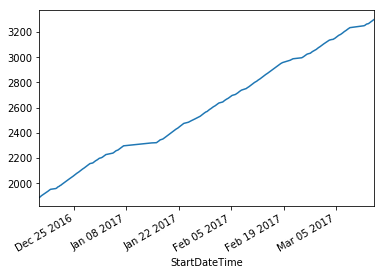

In [52]:
df_hours = df_min[(df_min['CumulativeEngineHours'] >= 0)]
AO = pd.Series(df_hours['CumulativeEngineHours'].values, index=df_hours['StartDateTime'])
AO.plot()

### ActivityName == Bogging && Wait Red Light

These seem the most activities
- **Bogging** doing work
- **Wait Red Light** most common stop reason

Findings
- there seems to be a dip in wait red lights end of Jan and beginning of March

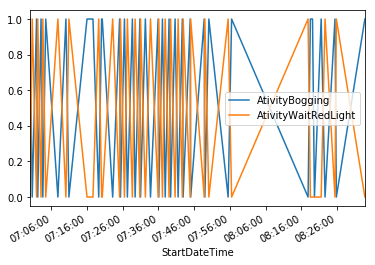

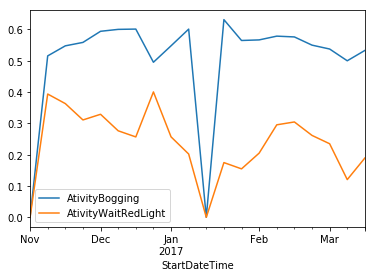

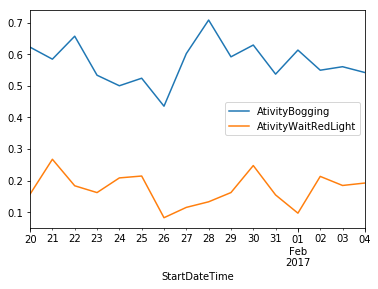

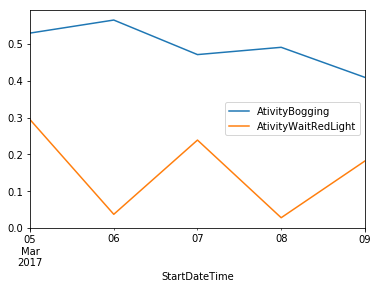

In [186]:
# TODO need better markspace without the diagonal ramp and up and down view
df_min['AtivityBogging'] = df_min['ActivityName'].apply(lambda x: 1 if (x == 'Bogging') else 0)
df_min['AtivityWaitRedLight'] = df_min['ActivityName'].apply(lambda x: 1 if (x == 'Wait Red Light') else 0)

# instantneous for an hour
df_min[['AtivityBogging', 'AtivityWaitRedLight']]['2016-11-11 07' : '2016-11-11 08'].plot()

# all time averaged weekly
df_weekly = df_min.resample("W")
df_weekly[['AtivityBogging', 'AtivityWaitRedLight']].plot()

# all time averaged weekly
df_daily = df_min.resample("D")
# low period end Jan
df_daily[['AtivityBogging', 'AtivityWaitRedLight']]['2017-01-20' : '2017-02-04'].plot()
# low period mid Mar
df_daily[['AtivityBogging', 'AtivityWaitRedLight']]['2017-03-05' : '2017-03-09'].plot()

## TODO

- [ ] when does DataSource [DCS Triggered - red light] get triggered? is it associated with anything
- [ ] match with bogger data
- [ ] match with detailed data